## Тема “Обучение без учителя”

### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
data = boston['data']
feature_names = boston['feature_names']

In [5]:
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
target = boston['target']
y = pd.DataFrame(target, columns=['price'])
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
price    506 non-null float64
dtypes: float64(1)
memory usage: 4.0 KB


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [12]:
from sklearn.manifold import TSNE

In [13]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

print(X_train_scaled.shape, X_train_tsne.shape)

(404, 13) (404, 2)


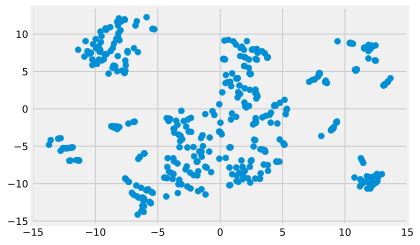

In [14]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [15]:
from sklearn.cluster import KMeans

In [16]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [17]:
train_labels = kmeans.fit_predict(X_train_scaled)
print(train_labels)

[1 0 2 1 0 0 0 2 1 1 0 0 0 1 0 0 0 2 0 2 1 0 2 0 2 0 1 2 0 2 0 0 1 1 0 2 2
 0 0 2 2 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0
 0 0 2 0 1 1 1 1 2 0 1 1 1 2 1 0 0 1 1 2 2 0 1 1 0 1 0 2 2 2 0 0 2 0 0 0 1
 2 0 2 2 1 1 1 0 0 0 1 1 0 2 1 1 0 2 1 2 0 0 0 0 1 0 2 0 1 0 1 0 0 0 1 0 0
 0 0 0 1 2 0 2 1 1 1 1 1 2 0 1 0 1 2 2 0 2 0 0 2 2 1 2 2 1 1 2 0 0 0 1 0 1
 1 2 2 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 2 0 0 0 0 2 0 1 0 1 2 1 0 1 1 1
 1 0 0 2 2 0 2 0 1 0 0 0 0 0 1 1 2 0 0 2 2 1 1 0 2 1 1 0 2 2 1 0 2 1 0 0 1
 0 1 0 0 2 0 0 0 0 0 0 2 1 0 1 0 0 2 0 1 1 2 1 1 1 0 0 1 2 2 0 1 2 1 1 1 0
 2 1 0 0 0 0 0 0 1 2 0 1 2 2 0 2 0 2 0 1 2 0 0 0 2 1 0 1 1 0 1 2 0 0 1 0 1
 1 0 0 1 2 0 0 2 0 0 0 1 0 0 0 0 1 0 1 0 2 2 1 2 1 0 1 2 0 1 2 0 2 0 2 0 2
 0 0 1 0 2 1 2 1 0 1 2 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 2 0 0 0 2 1 0]


In [18]:
kmeans.inertia_

2822.1652958346845

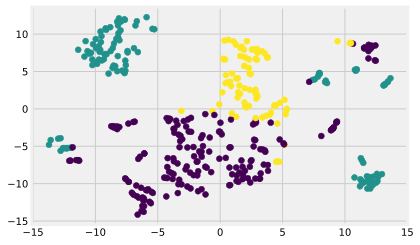

In [19]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1],c=train_labels)

plt.show()

In [31]:
print('Среднее значение цены для каждого кластера:')
print('Кластер 0: {}'.format(y_train[train_labels == 0].mean()))
print('Кластер 1: {}'.format(y_train[train_labels == 1].mean()))
print('Кластер 2: {}'.format(y_train[train_labels == 2].mean()))

Среднее значение цены для каждого кластера:
Кластер 0: price    24.971204
dtype: float64
Кластер 1: price    16.179688
dtype: float64
Кластер 2: price    27.874118
dtype: float64


In [28]:
print('Значение параметра CRIM для каждого кластера в отдельности')
print('Кластер 0: {}'.format(X_train.loc[train_labels == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[train_labels == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[train_labels == 2, 'CRIM'].mean()))

Значение параметра CRIM для каждого кластера в отдельности
Кластер 0: 0.42098554973821983
Кластер 1: 10.637094062500003
Кластер 2: 0.0721184705882353


### Задание 3*
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [33]:
test_labels = kmeans.predict(X_test_scaled)
test_labels

array([0, 2, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 1, 2, 2, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1,
       0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 0, 0, 2, 0, 1, 2, 2,
       1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0])

In [34]:
print('Среднее значение цены для каждого кластера:')
print('Кластер 0: {}'.format(y_test[test_labels == 0].mean()))
print('Кластер 1: {}'.format(y_test[test_labels == 1].mean()))
print('Кластер 2: {}'.format(y_test[test_labels == 2].mean()))

Среднее значение цены для каждого кластера:
Кластер 0: price    21.860784
dtype: float64
Кластер 1: price    16.437143
dtype: float64
Кластер 2: price    31.35
dtype: float64


In [35]:
print('Значение параметра CRIM для каждого кластера в отдельности')
print('Кластер 0: {}'.format(X_test.loc[test_labels == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[test_labels == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_test.loc[test_labels == 2, 'CRIM'].mean()))

Значение параметра CRIM для каждого кластера в отдельности
Кластер 0: 0.26607882352941176
Кластер 1: 10.165531142857143
Кластер 2: 0.062060000000000004
